In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#file = "FINAL-DATA.csv"
file2 = "MORE-DATA.csv"
file = "FINAL-DATA.csv"
#MORE-DATA.csv
df = pd.read_csv(file)
df2 = pd.read_csv(file2)
print(df.head())


C:\Users\Administrador2\AppData\Local\Temp\ipykernel_7208\2127951860.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


   YEAR  INDCAT   INCOME  WAGEINC  DEBT2INC     DEBT  NETWORTH  EDCL EDUC
0  1989       4  9737.17  1947.43  0.157130  1530.01   2201.71     2    8
1  1989       4  9737.17  1947.43  0.136052  1324.76   2406.96     2    8
2  1989       4  9737.17  1947.43  0.174376  1697.93   2033.79     2    8
3  1989       4  9737.17  1947.43  0.172460  1679.27   2052.45     2    8
4  1989       4  9737.17  1947.43  0.151382  1474.03   2257.69     2    8


C:\Users\Administrador2\AppData\Local\Temp\ipykernel_7208\2127951860.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file2)


HI
             DEBT
AGE              
17   10476.570000
18    6237.564333
19    8558.437212
20   13487.161537
21   12183.908340
..            ...
91    7780.253755
92     431.835156
93   11121.824733
94    5541.963750
95   14300.113760

[79 rows x 1 columns]


<AxesSubplot:title={'center':'INCOME by AGE'}, xlabel='AGE', ylabel='NETWORTH'>

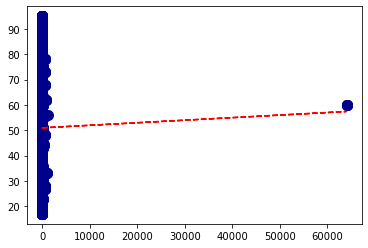

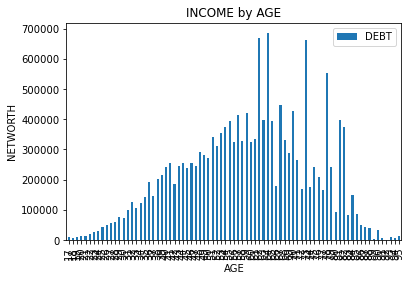

In [4]:
EDCL_AGE_mean1 = df2.groupby("AGE")[["DEBT"]].mean()
print("HI")
print(EDCL_AGE_mean1)

x = df2["DEBT2INC"]
y = df2["AGE"]

plt.scatter(x, y, 100, c = "DarkBlue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

EDCL_AGE_mean1.plot(kind = "bar", title = "INCOME by AGE", ylabel = "NETWORTH", xlabel = "AGE")

HI
          NETWORTH
EDCL              
1     1.445893e+06
2     2.292111e+06
3     4.559290e+06
4     1.872494e+07
HI
               INCOME
INDCAT               
1       813904.771329
2       944062.571232
4       337355.494396


<AxesSubplot:title={'center':'Networth by INDCAT'}, xlabel='INDCAT', ylabel='NETWORTH'>

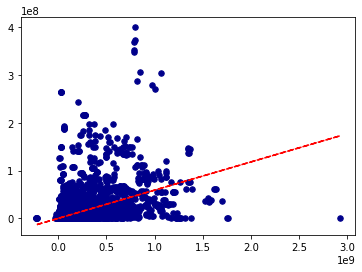

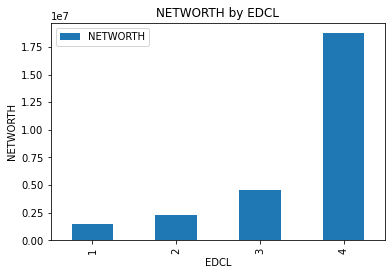

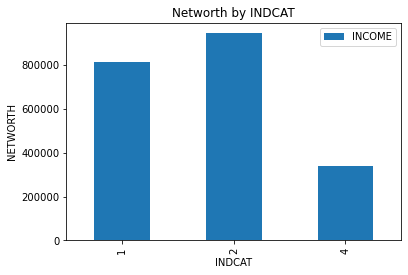

In [7]:
EDCL_mean1 = df.groupby("EDCL")[["NETWORTH"]].mean()
print("HI")
print(EDCL_mean1)

INDCAT_mean = df.groupby("INDCAT")[["INCOME"]].mean()
print("HI")
print(INDCAT_mean)

x = df["NETWORTH"]
y = df["INCOME"]

#Scatter Plot: 
plt.scatter(x, y, 30, c = "DarkBlue")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Bar Charts: 
EDCL_mean1.plot(kind = "bar", title = "NETWORTH by EDCL", ylabel = "NETWORTH", xlabel = "EDCL")
INDCAT_mean.plot(kind = "bar", title = "Networth by INDCAT", ylabel = "NETWORTH", xlabel = "INDCAT")

In [ ]:
col = 'INDCAT' #<-edit this value! column name as it appears in dataframe
col_name = 'Industry' #<-edit this value! descriptive name for column
freq = df2[col].value_counts().rename_axis(col_name).reset_index(name='# of Workers')
freq = freq.sort_values(by = col_name)
print(freq)

ax = freq.plot.barh(x=col_name, y='# of Workers', rot=0)

In [ ]:
col = 'EDCL' #<-edit this value! column name as it appears in dataframe
col_name = 'Education category of head of household' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='# of Workers')
freq = freq.sort_values(by = col_name)
print(freq)

ax = freq.plot.barh(x=col_name, y='# of Workers', rot=0)

In [ ]:
EDCL_mean = df.groupby("EDCL")[["DEBT2INC"]]
print(EDCL_mean)

In [ ]:
NETWORTH_Average = df[["NETWORTH"]].mean()
print(NETWORTH_Average)

DEBT_Average = df[["DEBT"]].mean()
print(DEBT_Average)

INCOME_Average = df[["INCOME"]].mean()
print(INCOME_Average)

EDUCATION_Average = df[["EDCL"]].mean()
print(EDUCATION_Average)

DEBT2INC_Average = df[["DEBT2INC"]].mean()
print(DEBT2INC_Average)